# Logistic Regression and Linear Discriminant Analysis

## 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


cars = pd.read_csv('Car Crash Data.csv', index_col=0)

In [48]:
cars.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [49]:
cars.shape

(11217, 15)

In [50]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.4+ MB


In [51]:
cars.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,10-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644022,0.47883,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.427654,18.192429,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103236,1.056805,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.177944,5.658704,1953.0,1991.0,1995.0,1999.0,2003.0


In [52]:
cars.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [53]:
cars['injSeverity'].fillna(cars['injSeverity'].mode()[0], inplace= True)

/var/folders/31/gz490h2j3lxcymw1wzdrq_ym0000gn/T/ipykernel_30255/2141141020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['injSeverity'].fillna(cars['injSeverity'].mode()[0], inplace= True)


In [54]:
cars.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [55]:
for col in cars.columns:
    if cars[col].dtype == 'object':
        print(col)
        print(cars[col].value_counts(normalize= True))
        print('\n')

dvcat
dvcat
10-24      0.482660
25-39      0.300259
40-54      0.119818
55+        0.072123
1-9km/h    0.025140
Name: proportion, dtype: float64


Survived
Survived
survived        0.894803
Not_Survived    0.105197
Name: proportion, dtype: float64


airbag
airbag
airbag    0.629758
none      0.370242
Name: proportion, dtype: float64


seatbelt
seatbelt
belted    0.699741
none      0.300259
Name: proportion, dtype: float64


sex
sex
m    0.539182
f    0.460818
Name: proportion, dtype: float64


abcat
abcat
deploy      0.389141
unavail     0.370242
nodeploy    0.240617
Name: proportion, dtype: float64


occRole
occRole
driver    0.783275
pass      0.216725
Name: proportion, dtype: float64


caseid
caseid
73:100:2    0.000624
78:2:1      0.000535
73:110:1    0.000535
49:156:1    0.000535
74:74:2     0.000535
              ...   
74:186:1    0.000089
74:185:2    0.000089
74:183:1    0.000089
74:180:2    0.000089
2:95:1      0.000089
Name: proportion, Length: 6488, dtype: float64




In [56]:
cars = cars.drop('caseid', axis = 1)

In [57]:
cars['dvcat'] = cars['dvcat'].replace({'1-9km/h' : '1', '10-24' : '2', '25-39' : '3', '40-54' : '4', '55+' : '5'})

In [58]:
cars['Survived'] = cars['Survived'].replace({'survived' : '1', 'Not_Survived' : '0'})

In [59]:
cars['airbag'] = cars['airbag'].replace({'airbag' : '1', 'none': '0'})

In [60]:
cars['seatbelt'] = cars['seatbelt'].replace({'belted': '1', 'none': '0'})

In [61]:
cars['sex'] = cars['sex'].replace({'m': '1', 'f': '2'})

In [62]:
cars['abcat'] = cars['abcat'].replace({'deploy': '1', 'nodeploy': '2', 'unavail': '3'})

In [63]:
cars['occRole']= cars['occRole'].replace({'driver' : '1', 'pass': '2'})

In [64]:
for col in cars.columns:
    if cars[col].dtype == 'object':
        cars[col] = cars[col].astype('category')
        print(col)
        print(cars[col].value_counts(normalize= True))
        print('\n')

dvcat
dvcat
2    0.482660
3    0.300259
4    0.119818
5    0.072123
1    0.025140
Name: proportion, dtype: float64


Survived
Survived
1    0.894803
0    0.105197
Name: proportion, dtype: float64


airbag
airbag
1    0.629758
0    0.370242
Name: proportion, dtype: float64


seatbelt
seatbelt
1    0.699741
0    0.300259
Name: proportion, dtype: float64


sex
sex
1    0.539182
2    0.460818
Name: proportion, dtype: float64


abcat
abcat
1    0.389141
3    0.370242
2    0.240617
Name: proportion, dtype: float64


occRole
occRole
1    0.783275
2    0.216725
Name: proportion, dtype: float64




In [65]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   dvcat        11217 non-null  category
 1   weight       11217 non-null  float64 
 2   Survived     11217 non-null  category
 3   airbag       11217 non-null  category
 4   seatbelt     11217 non-null  category
 5   frontal      11217 non-null  int64   
 6   sex          11217 non-null  category
 7   ageOFocc     11217 non-null  int64   
 8   yearacc      11217 non-null  int64   
 9   yearVeh      11217 non-null  float64 
 10  abcat        11217 non-null  category
 11  occRole      11217 non-null  category
 12  deploy       11217 non-null  int64   
 13  injSeverity  11217 non-null  float64 
dtypes: category(7), float64(3), int64(4)
memory usage: 778.7 KB


In [66]:
cars['frontal'] = cars['frontal'].astype('category')
cars['injSeverity'] = cars['injSeverity'].astype('category')
cars['deploy'] = cars['deploy'].astype('category')

In [67]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   dvcat        11217 non-null  category
 1   weight       11217 non-null  float64 
 2   Survived     11217 non-null  category
 3   airbag       11217 non-null  category
 4   seatbelt     11217 non-null  category
 5   frontal      11217 non-null  category
 6   sex          11217 non-null  category
 7   ageOFocc     11217 non-null  int64   
 8   yearacc      11217 non-null  int64   
 9   yearVeh      11217 non-null  float64 
 10  abcat        11217 non-null  category
 11  occRole      11217 non-null  category
 12  deploy       11217 non-null  category
 13  injSeverity  11217 non-null  category
dtypes: category(10), float64(2), int64(2)
memory usage: 549.1 KB


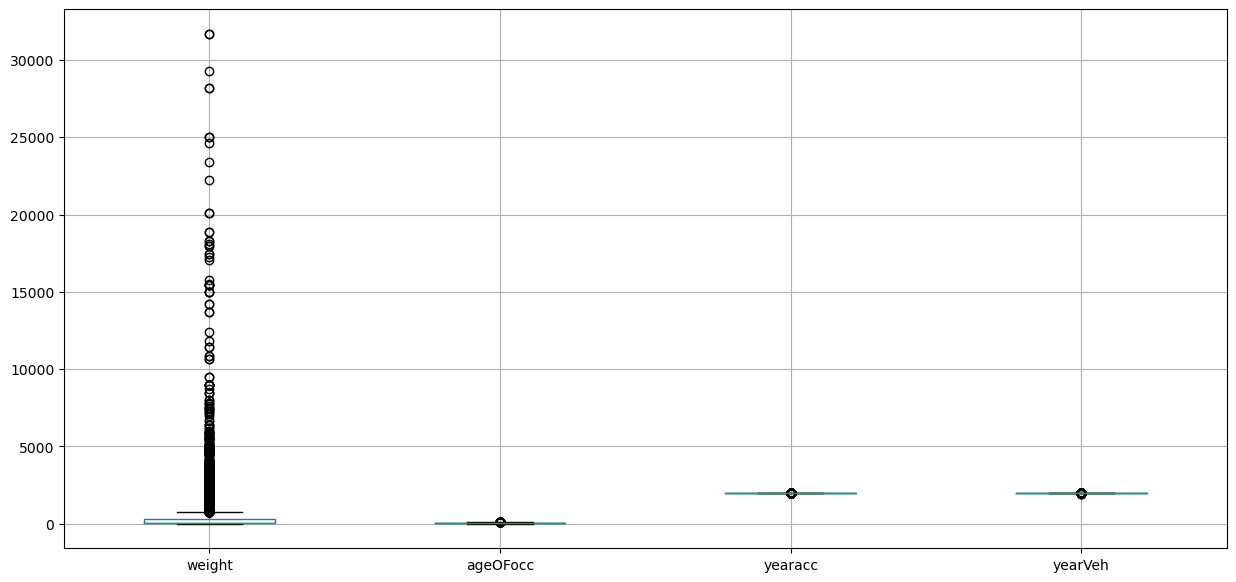

In [68]:
plt.figure(figsize= (15,7))
cars.boxplot();

In [69]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr_bound = Q1 - (1.5 * IQR)
    ur_bound = Q3 + (1.5 * IQR)
    return lr_bound, ur_bound


In [70]:
columns = cars[['weight', 'ageOFocc', 'yearacc', 'yearVeh']]
for col in columns:
    lr_bound, ur_bound = remove_outlier(cars[col])
    cars[col] = np.where(cars[col]< lr_bound, lr_bound, cars[col])
    cars[col] = np.where(cars[col] > ur_bound, ur_bound, cars[col])

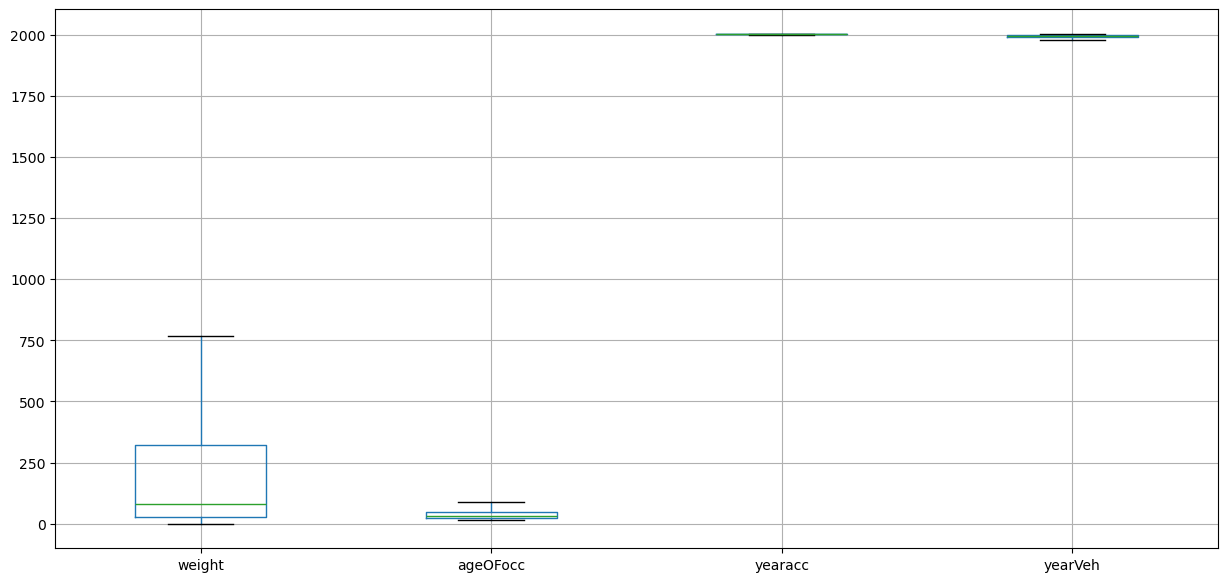

In [71]:
plt.figure(figsize= (15,7))
cars.boxplot();

In [72]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,11217.0,219.454706,261.963636,0.0,28.292,82.195,324.056,767.702
ageOFocc,11217.0,37.408220,18.136557,16.0,22.000,33.000,48.000,87.000
yearacc,11217.0,2001.188553,0.816681,1999.5,2001.000,2001.000,2002.000,2002.000
yearVeh,11217.0,1994.247303,5.405095,1979.0,1991.000,1995.000,1999.000,2003.000


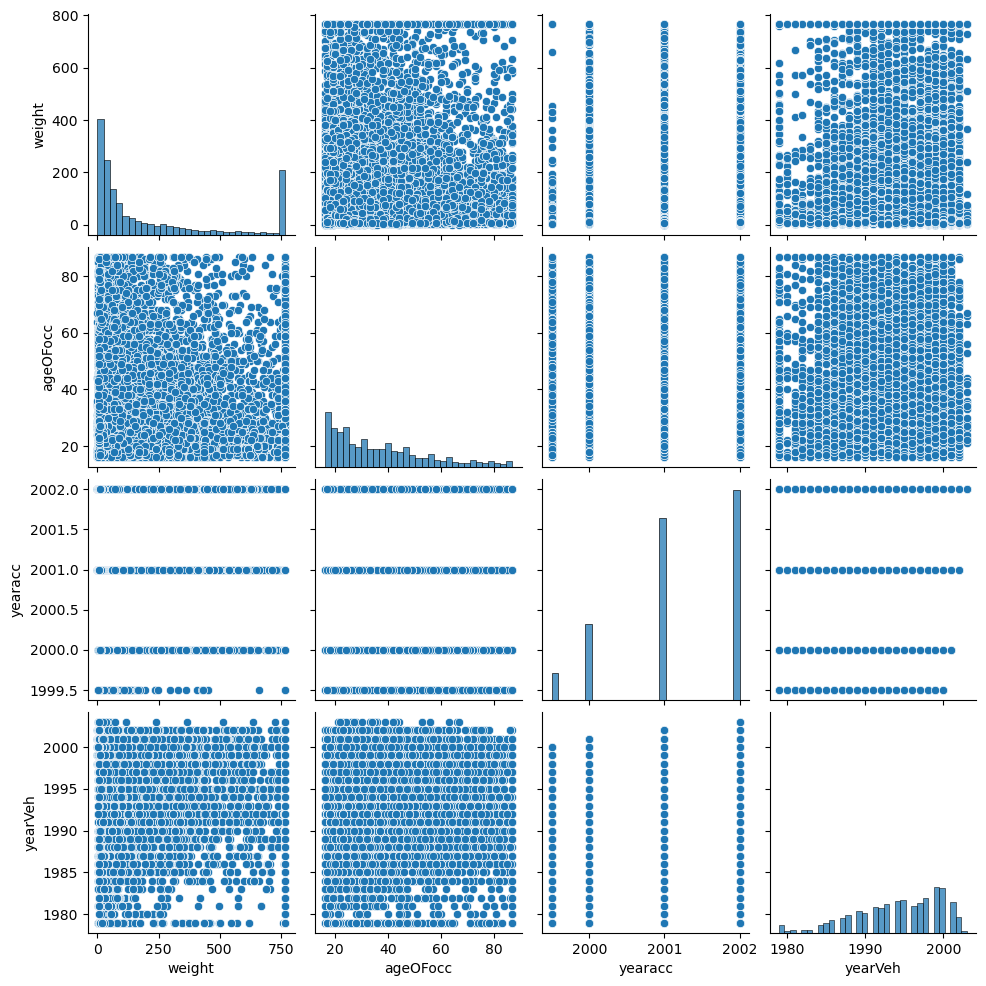

In [73]:
sns.pairplot(cars);

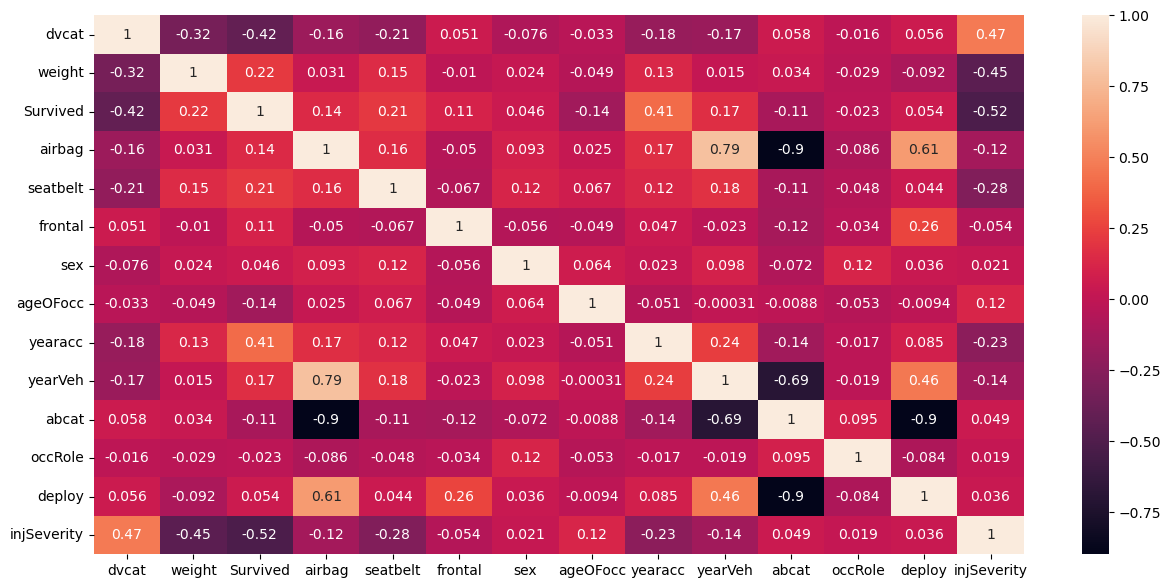

In [74]:
corr_cars = cars.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr_cars, annot=True);

### Univariate Analysis

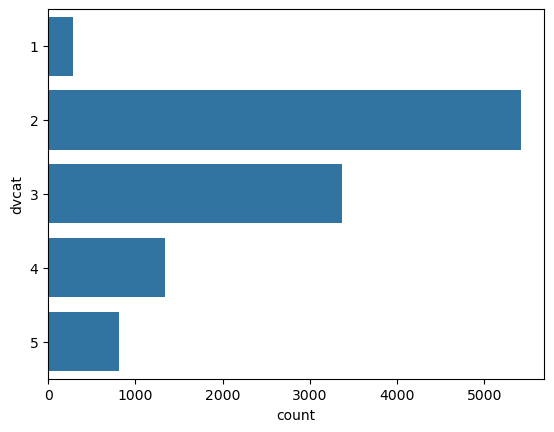

In [75]:
sns.countplot(cars['dvcat']);

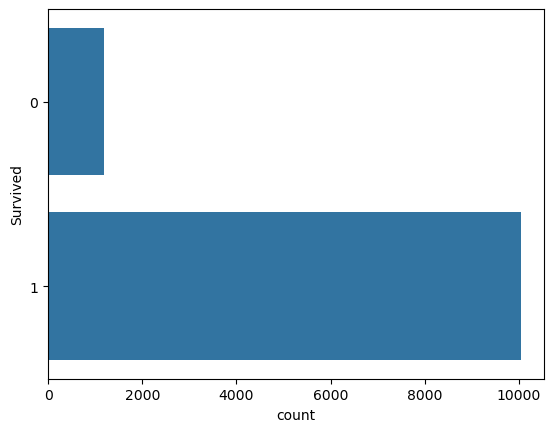

In [76]:
sns.countplot(cars['Survived']);

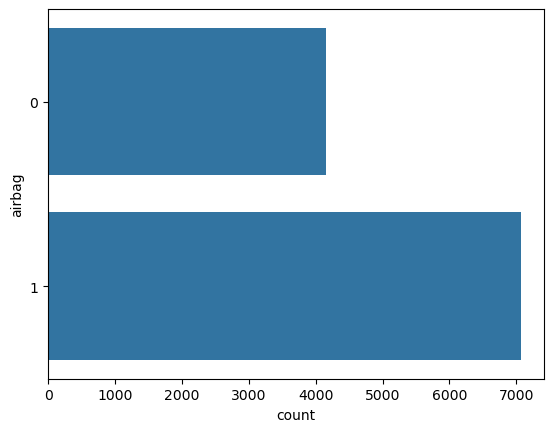

In [77]:
sns.countplot(cars['airbag']);

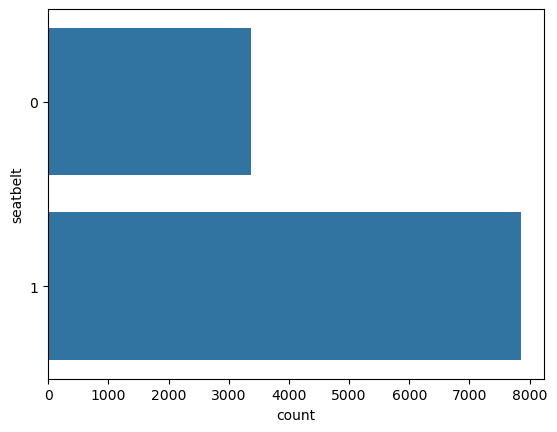

In [78]:
sns.countplot(cars['seatbelt']);

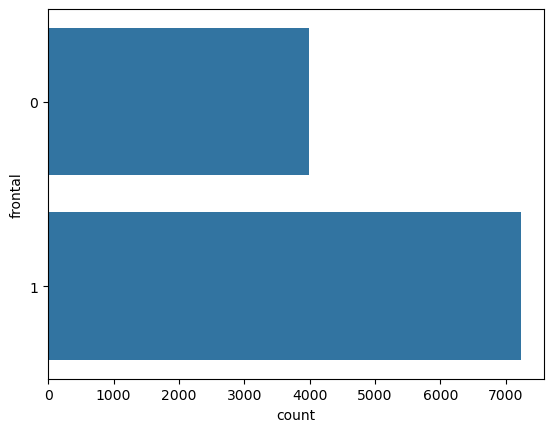

In [79]:
sns.countplot(cars['frontal']);

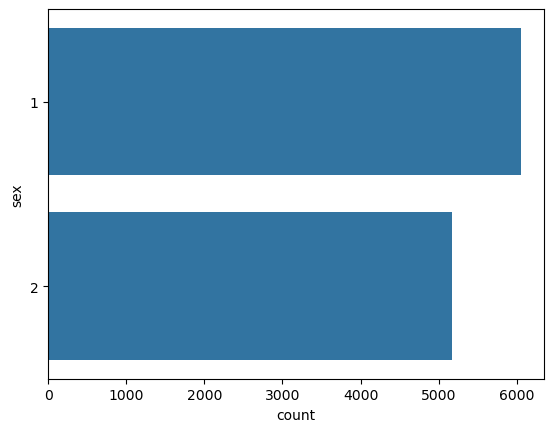

In [80]:
sns.countplot(cars['sex']);

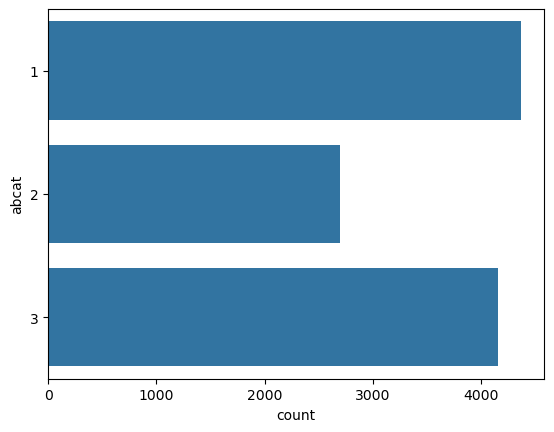

In [81]:
sns.countplot(cars['abcat']);

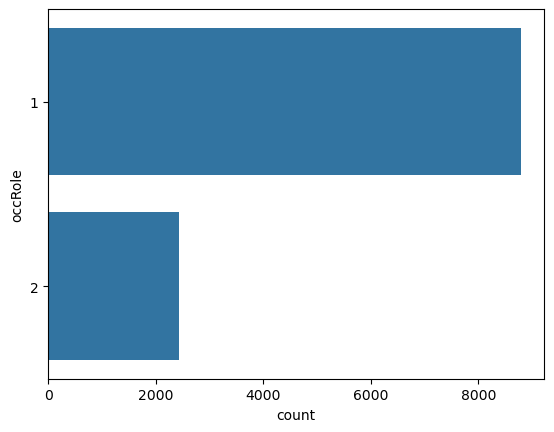

In [82]:
sns.countplot(cars['occRole']);

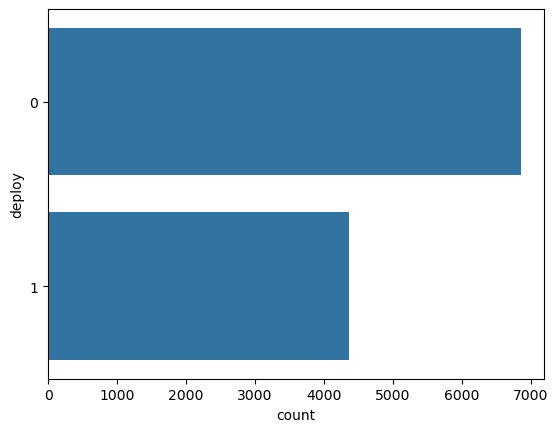

In [83]:
sns.countplot(cars['deploy']);

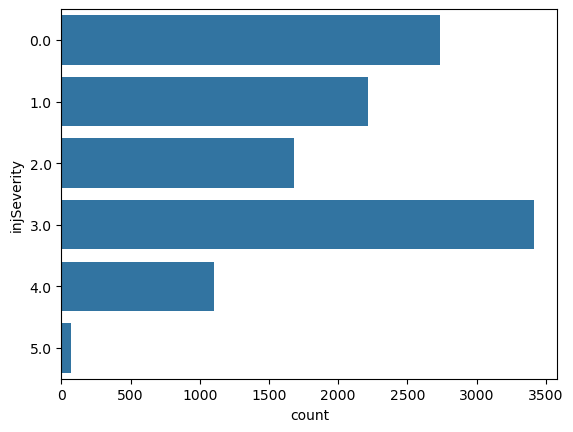

In [84]:
sns.countplot(cars['injSeverity']);

## 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [85]:
cars_dummy = pd.get_dummies(cars, drop_first=True)
cars_dummy.head(10)

,weight,ageOFocc,yearacc,yearVeh,dvcat_2,dvcat_3,dvcat_4,dvcat_5,Survived_1,airbag_1,...,sex_2,abcat_2,abcat_3,occRole_2,deploy_1,injSeverity_1.0,injSeverity_2.0,injSeverity_3.0,injSeverity_4.0,injSeverity_5.0
0,27.078,32.0,1999.5,1987.0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,89.627,54.0,1999.5,1994.0,False,True,False,False,False,True,...,True,True,False,False,False,False,False,False,True,False
2,27.078,67.0,1999.5,1992.0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,27.078,64.0,1999.5,1992.0,False,False,False,True,False,False,...,True,False,True,True,False,False,False,False,True,False
4,13.374,23.0,1999.5,1986.0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
5,12.383,77.0,1999.5,1992.0,False,True,False,False,False,False,...,True,False,True,True,False,False,False,False,True,False
6,13.374,34.0,1999.5,1990.0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
7,13.374,37.0,1999.5,1995.0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
8,13.374,33.0,1999.5,1987.0,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,True,False
9,15.355,84.0,1999.5,1996.0,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False


In [86]:
cars_dummy.columns

Index(['weight', 'ageOFocc', 'yearacc', 'yearVeh', 'dvcat_2', 'dvcat_3',
       'dvcat_4', 'dvcat_5', 'Survived_1', 'airbag_1', 'seatbelt_1',
       'frontal_1', 'sex_2', 'abcat_2', 'abcat_3', 'occRole_2', 'deploy_1',
       'injSeverity_1.0', 'injSeverity_2.0', 'injSeverity_3.0',
       'injSeverity_4.0', 'injSeverity_5.0'],
      dtype='object')

In [87]:
from sklearn.model_selection import train_test_split

X = cars_dummy.drop('Survived_1', axis= 1)
y = cars_dummy['Survived_1']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2, stratify= cars_dummy['Survived_1'])

In [89]:
y_train.value_counts(normalize= True)

Survived_1
True     0.89479
False    0.10521
Name: proportion, dtype: float64

In [90]:
y_test.value_counts(normalize= True)

Survived_1
True     0.894831
False    0.105169
Name: proportion, dtype: float64

### Logistic Regression model

In [91]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='newton-cg', max_iter=10000, n_jobs=2, verbose=True, penalty=None)
log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Newton-CG iter = 0
  Check Convergence
    max |gradient| <= tol: 790.1524009680161 <= 0.0001 False
Newton-CG iter = 1
  Check Convergence
    max |gradient| <= tol: 130.88871763002655 <= 0.0001 False
Newton-CG iter = 2
  Check Convergence
    max |gradient| <= tol: 18.82746632146993 <= 0.0001 False
Newton-CG iter = 3
  Check Convergence
    max |gradient| <= tol: 21.940637292946366 <= 0.0001 False
Newton-CG iter = 4
  Check Convergence
    max |gradient| <= tol: 7.3580052131489895 <= 0.0001 False
Newton-CG iter = 5
  Check Convergence
    max |gradient| <= tol: 4.955356135286761 <= 0.0001 False
Newton-CG iter = 6
  Check Convergence
    max |gradient| <= tol: 7.593562959287943 <= 0.0001 False
Newton-CG iter = 7
  Check Convergence
    max |gradient| <= tol: 1.5781150675661946 <= 0.0001 False
Newton-CG iter = 8
  Check Convergence
    max |gradient| <= tol: 1.3247475772810553 <= 0.0001 False
Newton-CG iter = 9
  Check Convergence
    max |gradient| <= tol: 2.1623987991578733 <= 0.0001 

LogisticRegression(max_iter=10000, n_jobs=2, penalty=None, solver='newton-cg',
                   verbose=True)

### Linear Discriminant Analysis

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [93]:
y_train_pred = lda_clf.predict(X_train)
y_test_pred = lda_clf.predict(X_test)

In [94]:
y_test_pred_prob_lda = lda_clf.predict_proba(X_test)
pd.DataFrame(y_test_pred_prob_lda).head(10)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


## 2.3) Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Compare both the models and write inferences, which model is best/optimized.

#### Logistic Regression

In [95]:
y_train_pred_log= log.predict(X_train)
y_test_pred_log = log.predict(X_test)

In [96]:
y_train_pred_prob = log.predict_proba(X_train)
pd.DataFrame(y_train_pred_prob).head(10)

,0,1
0,0.002842,0.997158
1,0.034115,0.965885
2,0.012836,0.987164
3,0.000350,0.999650
4,0.002933,0.997067
5,0.000027,0.999973
6,0.000181,0.999819
7,0.000079,0.999921
8,0.000336,0.999664
9,0.000673,0.999327


In [97]:
y_test_pred_prob = log.predict_proba(X_test)
pd.DataFrame(y_test_pred_prob).head(10)

,0,1
0,0.000526,0.999474
1,0.000132,0.999868
2,0.000160,0.999840
3,0.000040,0.999960
4,0.004032,0.995968
5,0.000069,0.999931
6,0.028118,0.971882
7,0.000465,0.999535
8,0.000461,0.999539
9,0.000055,0.999945


##### Accuracy

In [98]:
#training data
log.score(X_train, y_train)

0.9904470768055025

In [99]:
#test data
log.score(X_test, y_test)

0.9884135472370766

##### AUC & ROC

In [100]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, accuracy_score

AUC : 0.996


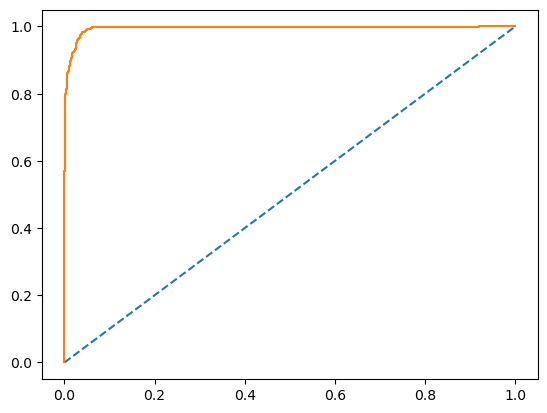

In [101]:
#train data

probs = log.predict_proba(X_train)

probs = probs[:,1]

auc = roc_auc_score(y_train, probs)

print('AUC : %.3f'%auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(train_fpr, train_tpr);

AUC : 0.995


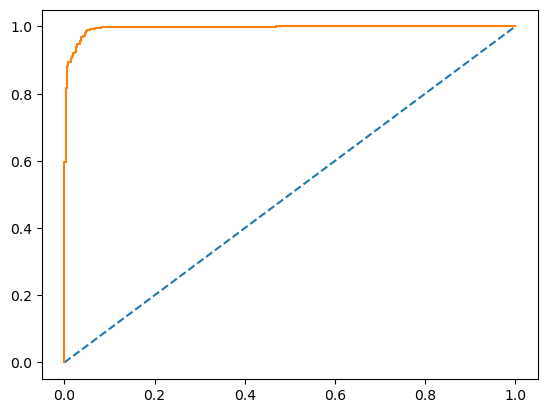

In [102]:
#test data

probs = log.predict_proba(X_test)

probs = probs[:,1]

auc = roc_auc_score(y_test, probs)

print('AUC : %.3f'%auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(test_fpr, test_tpr);

##### Confusion Matrix

In [103]:
# train data

cm_train_log = confusion_matrix(y_train, y_train_pred_log, labels=[0,1])

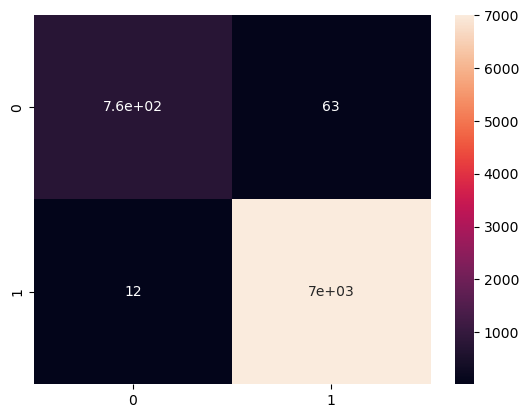

In [104]:
sns.heatmap(cm_train_log, annot= True);

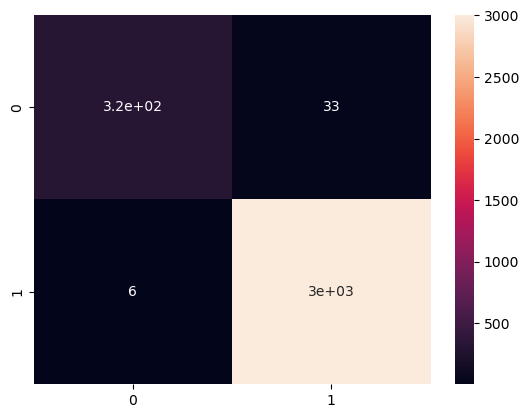

In [105]:
# test data

cm_test_log = confusion_matrix(y_test, y_test_pred_log, labels=[0,1])

sns.heatmap(cm_test_log, annot=True);

#### Linear Discriminant Analysis

In [106]:
y_train_pred_lda= lda_clf.predict(X_train)
y_test_pred_lda = lda_clf.predict(X_test)

In [107]:
y_train_pred_prob_lda = lda_clf.predict_proba(X_train)
pd.DataFrame(y_train_pred_prob_lda).head(10)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


##### Accuracy

In [108]:
#training data

lda_clf.score(X_train, y_train)

0.9904470768055025

In [109]:
#test data
lda_clf.score(X_test, y_test)

0.9887106357694593

#### Auc & Roc

AUC : 0.962


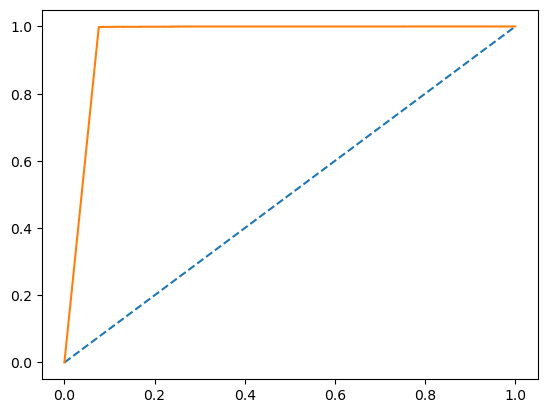

In [110]:
# train data

probs = lda_clf.predict_proba(X_train)

probs = probs[:,1]

auc = roc_auc_score(y_train, probs)

print('AUC : %.3f'%auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(train_fpr, train_tpr);

AUC : 0.953


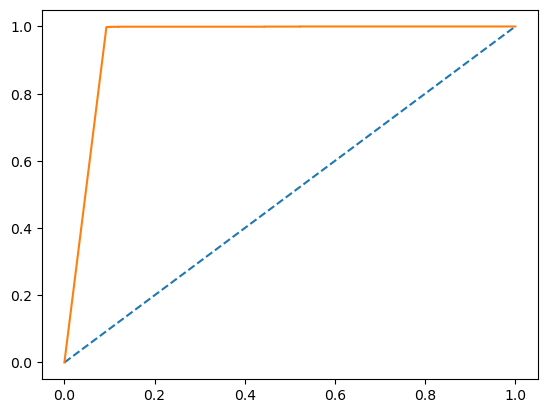

In [111]:
# test data

probs = lda_clf.predict_proba(X_test)

probs = probs[:,1]

auc = roc_auc_score(y_test, probs)

print('AUC : %.3f'%auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(test_fpr, test_tpr);

#### Confusion matrix

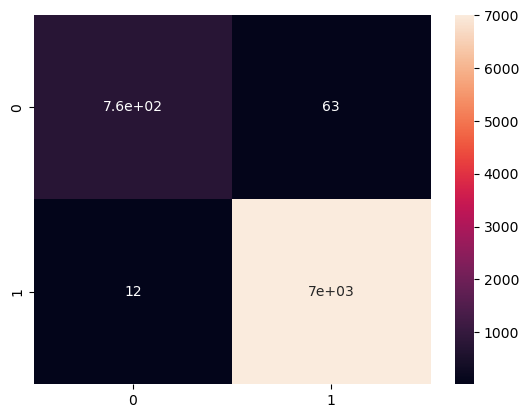

In [112]:
cm_train_lda = confusion_matrix(y_train, y_train_pred_lda, labels=[0,1])
sns.heatmap(cm_train_lda, annot= True);

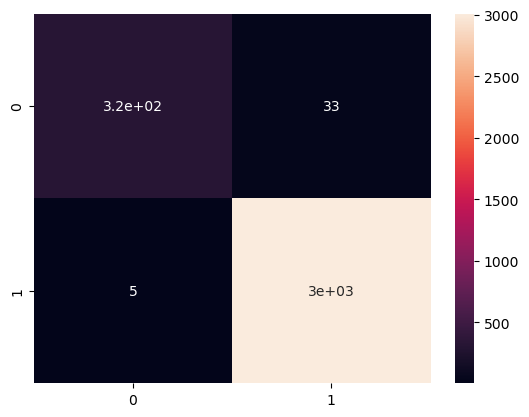

In [113]:
cm_test_lda = confusion_matrix(y_test, y_test_pred_lda, labels=[0,1])
sns.heatmap(cm_test_lda, annot= True);